In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [242]:
data = np.loadtxt('DATA.txt')
df = pd.DataFrame(data, columns=['GENDER', 'AGE', 'RF', 'SBP', 'HR1', 'ST', 'HR2', 'CRT', 'KIL', 'EVENT'])
std_HRBP = 2 
std_HRECG = 0.5

df['HR'] = std_HRECG**2 / (std_HRBP**2 + std_HRECG**2) * df['HR1'] + std_HRBP**2 / (std_HRBP**2 + std_HRECG**2) * df['HR2']


df['GUIDELINES'] = 0
df.loc[(df['CRT'] >= 1.2) & (df['ST'] == 1),'GUIDELINES'] = 1
df.loc[(df['KIL'] >= 2),'GUIDELINES'] = 1

a = df[df['EVENT'] == 1]
not_a = df[df['EVENT'] == 0]

df


,GENDER,AGE,RF,SBP,HR1,ST,HR2,CRT,KIL,EVENT,HR,GUIDELINES
0,1.0,33.0,0.0,132.0,91.579173,1.0,90.0,0.8,1.0,0.0,90.092893,0
1,1.0,69.0,0.0,147.0,52.785861,0.0,52.0,1.4,1.0,0.0,52.046227,0
2,1.0,63.0,0.0,142.0,40.692798,1.0,44.0,1.1,3.0,1.0,43.805459,1
3,0.0,79.0,0.0,147.0,106.420820,1.0,110.0,0.9,1.0,1.0,109.789460,0
4,0.0,61.0,0.0,107.0,82.148302,0.0,80.0,1.1,1.0,0.0,80.126371,0
...,...,...,...,...,...,...,...,...,...,...,...,...
452,1.0,69.0,0.0,95.0,99.801711,0.0,103.0,1.6,3.0,1.0,102.811865,1
453,1.0,51.0,1.0,140.0,87.339759,1.0,90.0,1.0,3.0,1.0,89.843515,1
454,0.0,57.0,0.0,120.0,113.138910,0.0,117.0,1.0,3.0,1.0,116.772877,1
455,1.0,87.0,0.0,149.0,50.035793,1.0,53.0,1.4,1.0,1.0,52.825635,1


## Priori

In [243]:
Prob_1 = len(a) / len(df)
Prob_0 = len(not_a) / len(df)

a['P(EVENT=1)'] = Prob_1
not_a['P(EVENT=0)'] = Prob_0

C:\Users\pcost\AppData\Local\Temp\ipykernel_5364\3223828830.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['P(EVENT=1)'] = Prob_1
C:\Users\pcost\AppData\Local\Temp\ipykernel_5364\3223828830.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_a['P(EVENT=0)'] = Prob_0


In [244]:
print(f'P(EVENT=1)={Prob_1}')
print(f'P(EVENT=0)={Prob_0}')

P(EVENT=1)=0.3916849015317287
P(EVENT=0)=0.6083150984682714


## Discrete

In [245]:
Prob_gender_1 = a['GENDER'].value_counts()/len(a)
Prob_gender_0 = not_a['GENDER'].value_counts()/len(not_a)

Prob_risk_1 = a['RF'].value_counts()/len(a)
Prob_risk_0 = not_a['RF'].value_counts()/len(not_a)

Prob_st_1 = a['ST'].value_counts()/len(a)
Prob_st_0 = not_a['ST'].value_counts()/len(not_a)

Prob_kl_1 = a['KIL'].value_counts()/len(a)
Prob_kl_0 = not_a['KIL'].value_counts()/len(not_a)

Prob_guid_1 = a['GUIDELINES'].value_counts()/len(a)
Prob_guid_0 = not_a['GUIDELINES'].value_counts()/len(not_a)

## Likelihood

In [246]:
print(f'P(GENDER=1|EVENT=1)={Prob_gender_1[1]}')
print(f'P(GENDER=0|EVENT=1)={Prob_gender_1[0]}')
print()
print(f'P(GENDER=1|EVENT=0)={Prob_gender_0[1]}')
print(f'P(GENDER=0|EVENT=0)={Prob_gender_0[0]}')

P(GENDER=1|EVENT=1)=0.7877094972067039
P(GENDER=0|EVENT=1)=0.2122905027932961

P(GENDER=1|EVENT=0)=0.7877697841726619
P(GENDER=0|EVENT=0)=0.21223021582733814


In [247]:
print(f'P(RF=1|EVENT=1)={Prob_risk_1[1]}')
print(f'P(RF=0|EVENT=1)={Prob_risk_1[0]}')
print()
print(f'P(RF=1|EVENT=0)={Prob_risk_0[1]}')
print(f'P(RF=0|EVENT=0)={Prob_risk_0[0]}')

P(RF=1|EVENT=1)=0.15083798882681565
P(RF=0|EVENT=1)=0.8491620111731844

P(RF=1|EVENT=0)=0.15467625899280577
P(RF=0|EVENT=0)=0.8453237410071942


In [248]:
print(f'P(ST=1|EVENT=1)={Prob_st_1[1]}')
print(f'P(ST=0|EVENT=1)={Prob_st_1[0]}')
print()
print(f'P(ST=1|EVENT=0)={Prob_st_0[1]}')
print(f'P(ST=0|EVENT=0)={Prob_st_0[0]}')

P(ST=1|EVENT=1)=0.8324022346368715
P(ST=0|EVENT=1)=0.16759776536312848

P(ST=1|EVENT=0)=0.3381294964028777
P(ST=0|EVENT=0)=0.6618705035971223


In [249]:
print(f'P(KIL=1|EVENT=1)={Prob_kl_1[1]}')
print(f'P(KIL=2|EVENT=1)={Prob_kl_1[2]}')
print(f'P(KIL=3|EVENT=1)={Prob_kl_1[3]}')
print()
print(f'P(KIL=1|EVENT=0)={Prob_kl_0[1]}')
print(f'P(KIL=2|EVENT=0)={Prob_kl_0[2]}')
print(f'P(KIL=3|EVENT=0)={Prob_kl_0[3]}')

P(KIL=1|EVENT=1)=0.6815642458100558
P(KIL=2|EVENT=1)=0.1452513966480447
P(KIL=3|EVENT=1)=0.17318435754189945

P(KIL=1|EVENT=0)=0.9748201438848921
P(KIL=2|EVENT=0)=0.017985611510791366
P(KIL=3|EVENT=0)=0.007194244604316547


In [250]:
print(f'P(GUID=1|EVENT=1)={Prob_guid_1[1]}')
print(f'P(GUID=0|EVENT=1)={Prob_guid_1[0]}')
print()
print(f'P(GUID=1|EVENT=0)={Prob_guid_0[1]}')
print(f'P(GUID=0|EVENT=0)={Prob_guid_0[0]}')

P(GUID=1|EVENT=1)=0.6368715083798883
P(GUID=0|EVENT=1)=0.36312849162011174

P(GUID=1|EVENT=0)=0.13309352517985612
P(GUID=0|EVENT=0)=0.8669064748201439


In [251]:
Prob1_discrete = Prob_gender_1[df['GENDER']].to_numpy()*Prob_risk_1[df['RF']].to_numpy()*Prob_st_1[df['ST']].to_numpy()*Prob_kl_1[df['KIL']].to_numpy()*Prob_guid_1[df['GUIDELINES']].to_numpy()
df['Prob_Discrete (Event=1)'] = Prob1_discrete*Prob_1

Prob0_discrete = Prob_gender_0[df['GENDER']].to_numpy()*Prob_risk_0[df['RF']].to_numpy()*Prob_st_0[df['ST']].to_numpy()*Prob_kl_0[df['KIL']].to_numpy()*Prob_guid_0[df['GUIDELINES']].to_numpy()
df['Prob_Discrete (Event=0)'] = Prob0_discrete*Prob_0

## Posterior

In [252]:
Prob_0_gender = Prob_gender_0*Prob_0
Prob_1_gender = Prob_gender_1*Prob_1

Prob_0_risk = Prob_risk_0*Prob_0
Prob_1_risk = Prob_risk_1*Prob_1

Prob_0_st = Prob_st_0*Prob_0
Prob_1_st = Prob_st_1*Prob_1

Prob_0_kl = Prob_kl_0*Prob_0
Prob_1_kl = Prob_kl_1*Prob_1

Prob_0_guid = Prob_guid_0*Prob_0
Prob_1_guid = Prob_guid_1*Prob_1

In [253]:
print(f'P(EVENT=1|GENDER=1)={Prob_1_gender[1]}')
print(f'P(EVENT=1|GENDER=0)={Prob_1_gender[0]}')
print()
print(f'P(EVENT=0|GENDER=1)={Prob_0_gender[1]}')
print(f'P(EVENT=0|GENDER=0)={Prob_0_gender[0]}')

P(EVENT=1|GENDER=1)=0.3085339168490153
P(EVENT=1|GENDER=0)=0.08315098468271336

P(EVENT=0|GENDER=1)=0.4792122538293217
P(EVENT=0|GENDER=0)=0.1291028446389497


In [254]:
print(f'P(EVENT=1|RF=1)={Prob_1_risk[1]}')
print(f'P(EVENT=1|RF=0)={Prob_1_risk[0]}')
print()
print(f'P(EVENT=0|RF=1)={Prob_0_risk[1]}')
print(f'P(EVENT=0|RF=0)={Prob_0_risk[0]}')

P(EVENT=1|RF=1)=0.059080962800875284
P(EVENT=1|RF=0)=0.3326039387308534

P(EVENT=0|RF=1)=0.09409190371991248
P(EVENT=0|RF=0)=0.5142231947483589


In [255]:
print(f'P(EVENT=1|ST=1)={Prob_1_st[1]}')
print(f'P(EVENT=1|ST=0)={Prob_1_st[0]}')
print()
print(f'P(EVENT=0|ST=1)={Prob_0_st[1]}')
print(f'P(EVENT=0|ST=0)={Prob_0_st[0]}')

P(EVENT=1|ST=1)=0.32603938730853393
P(EVENT=1|ST=0)=0.06564551422319474

P(EVENT=0|ST=1)=0.20568927789934355
P(EVENT=0|ST=0)=0.4026258205689278


In [256]:
print(f'P(EVENT=1|KIL=1)={Prob_1_kl[1]}')
print(f'P(EVENT=1|KIL=2)={Prob_1_kl[2]}')
print(f'P(EVENT=1|KIL=3)={Prob_1_kl[3]}')
print()
print(f'P(EVENT=0|KIL=1)={Prob_0_kl[1]}')
print(f'P(EVENT=0|KIL=2)={Prob_0_kl[2]}')
print(f'P(EVENT=1|KIL=3)={Prob_1_kl[3]}')

P(EVENT=1|KIL=1)=0.26695842450765866
P(EVENT=1|KIL=2)=0.05689277899343546
P(EVENT=1|KIL=3)=0.06783369803063458

P(EVENT=0|KIL=1)=0.5929978118161926
P(EVENT=0|KIL=2)=0.010940919037199124
P(EVENT=1|KIL=3)=0.06783369803063458


In [257]:
print(f'P(EVENT=1|GUID=1)={Prob_1_guid[1]}')
print(f'P(EVENT=1|GUID=0)={Prob_1_guid[0]}')
print()
print(f'P(EVENT=0|GUID=1)={Prob_0_guid[1]}')
print(f'P(EVENT=0|GUID=0)={Prob_0_guid[0]}')

P(EVENT=1|GUID=1)=0.24945295404814005
P(EVENT=1|GUID=0)=0.14223194748358864

P(EVENT=0|GUID=1)=0.08096280087527354
P(EVENT=0|GUID=0)=0.5273522975929978


## Continuous

In [258]:
#Gaussian
def gaussian(x, mean, std):
    return 1 / (std * np.sqrt(2 * np.pi)) * np.exp(-np.power(x - mean,2)/(2 * std**2))

## Likelihood

In [259]:
Prob_age_1 = gaussian(df['AGE'], a['AGE'].mean(), a['AGE'].std())
Prob_age_0 = gaussian(df['AGE'], not_a['AGE'].mean(), not_a['AGE'].std())

Prob_sbp_1 = gaussian(df['SBP'], a['SBP'].mean(), a['SBP'].std())
Prob_sbp_0 = gaussian(df['SBP'], not_a['SBP'].mean(), not_a['SBP'].std())

Prob_hr_1= gaussian(df['HR'], a['HR'].mean(), a['HR'].std())
Prob_hr_0= gaussian(df['HR'], not_a['HR'].mean(), not_a['HR'].std())

Prob_crt_1 = gaussian(df['CRT'], a['CRT'].mean(), a['CRT'].std())
Prob_crt_0 = gaussian(df['CRT'], not_a['CRT'].mean(), not_a['CRT'].std())

In [261]:
Prob1_continuous = Prob_age_1.to_numpy()*Prob_sbp_1.to_numpy()*Prob_hr_1.to_numpy()*Prob_crt_1.to_numpy()
df['Prob_Continuous (Event=1)'] = Prob1_continuous*Prob_1

Prob0_continuous = Prob_age_0.to_numpy()*Prob_sbp_0.to_numpy()*Prob_hr_0.to_numpy()*Prob_crt_0.to_numpy()
df['Prob_Continuous (Event=0)'] = Prob0_continuous*Prob_0

In [262]:
Prob_age_1 = gaussian(a['AGE'].unique(), a['AGE'].mean(), a['AGE'].std())
Prob_age_0 = gaussian(not_a['AGE'].unique(), not_a['AGE'].mean(), not_a['AGE'].std())

Prob_sbp_1 = gaussian(a['SBP'].unique(), a['SBP'].mean(), a['SBP'].std())
Prob_sbp_0 = gaussian(not_a['SBP'].unique(), not_a['SBP'].mean(), not_a['SBP'].std())

Prob_hr_1= gaussian(a['HR'].unique(), a['HR'].mean(), a['HR'].std())
Prob_hr_0= gaussian(not_a['HR'].unique(), not_a['HR'].mean(), not_a['HR'].std())

Prob_crt_1 = gaussian(a['CRT'].unique(), a['CRT'].mean(), a['CRT'].std())
Prob_crt_0 = gaussian(not_a['CRT'].unique(), not_a['CRT'].mean(), not_a['CRT'].std())

## Posterior

In [263]:
Prob_1_age = Prob_age_1*Prob_1
Prob_0_age = Prob_age_0*Prob_0

Prob_1_sbp = Prob_sbp_1*Prob_1
Prob_0_sbp = Prob_sbp_0*Prob_0

Prob_1_hr = Prob_hr_1*Prob_1
Prob_0_hr = Prob_hr_0*Prob_0

Prob_1_crt = Prob_crt_1*Prob_1
Prob_0_crt = Prob_crt_0*Prob_0

In [264]:
def plot(x1, x2, y1, y0, xlabel, ylabel):
    plt.figure(figsize=(5,10))
    plt.subplot(2,1,1)
    plt.xlabel(xlabel)
    plt.ylabel('Probabilidade')
    plt.title(f'Distribuição Posterior de {xlabel} (Evento=1))')
    plt.bar(x1, y1, label='Evento=1')
    plt.subplot(2,1,2)
    plt.xlabel(xlabel)
    plt.ylabel('Probabilidade')
    plt.title(f'Distribuição Posterior de {xlabel} (Evento=0))')
    plt.bar(x2, y0, label='Evento=0')
    plt.show()

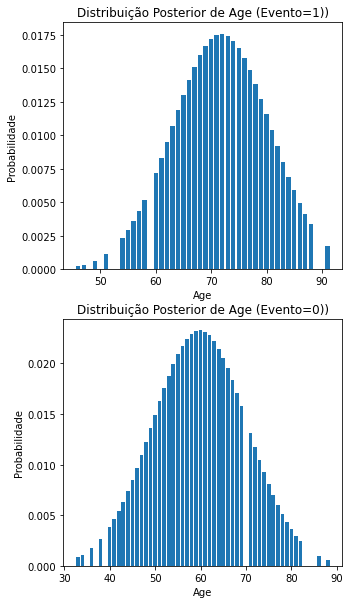

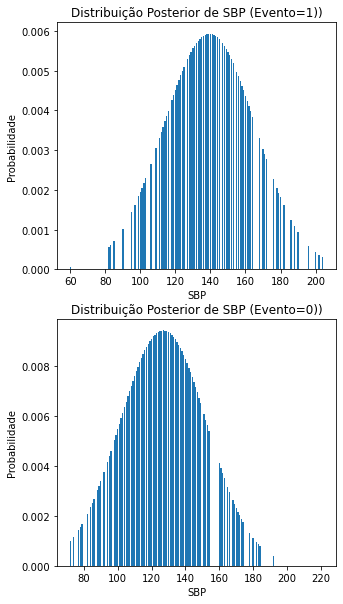

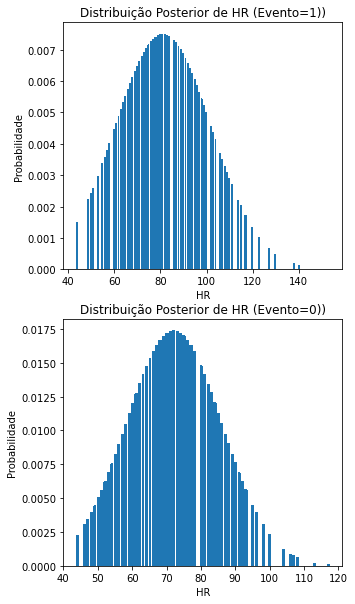

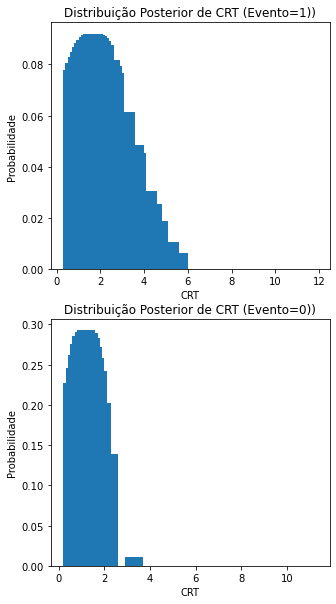

In [265]:
plot(a['AGE'].unique(), not_a['AGE'].unique(), Prob_1_age, Prob_0_age, 'Age', 'Probabilidade')
plot(a['SBP'].unique(), not_a['SBP'].unique(), Prob_1_sbp, Prob_0_sbp, 'SBP', 'Probabilidade')
plot(a['HR'].unique(), not_a['HR'].unique(), Prob_1_hr, Prob_0_hr, 'HR', 'Probabilidade')
plot(a['CRT'].unique(), not_a['CRT'].unique(), Prob_1_crt, Prob_0_crt, 'CRT', 'Probabilidade')

In [266]:
Prob_1_X = Prob1_continuous*Prob1_discrete*Prob_1
Prob_0_X = Prob0_continuous*Prob0_discrete*Prob_0

df['Probabilidade (Evento=1)'] = Prob_1_X
df['Probabilidade (Evento=0)'] = Prob_0_X

In [269]:
df

,GENDER,AGE,RF,SBP,HR1,ST,HR2,CRT,KIL,EVENT,HR,GUIDELINES,Prob_Discrete (Event=1),Prob_Discrete (Event=0),Prob_Continuous (Event=1),Prob_Continuous (Event=0),Probabilidade (Evento=1),Probabilidade (Evento=0)
0,1.0,33.0,0.0,132.0,91.579173,1.0,90.0,0.8,1.0,0.0,90.092893,0,0.053975,0.115753,6.464910e-11,7.024320e-08,8.908806e-12,1.336615e-08
1,1.0,69.0,0.0,147.0,52.785861,0.0,52.0,1.4,1.0,0.0,52.046227,0,0.010867,0.226580,4.051132e-07,8.501240e-07,1.124005e-08,3.166463e-07
2,1.0,63.0,0.0,142.0,40.692798,1.0,44.0,1.1,3.0,1.0,43.805459,1,0.024054,0.000131,1.370811e-07,5.032537e-07,8.418372e-09,1.085012e-10
3,0.0,79.0,0.0,147.0,106.420820,1.0,110.0,0.9,1.0,1.0,109.789460,0,0.014546,0.031184,2.905065e-07,1.677164e-08,1.078890e-08,8.597765e-10
4,0.0,61.0,0.0,107.0,82.148302,0.0,80.0,1.1,1.0,0.0,80.126371,0,0.002929,0.061042,2.506861e-07,3.083867e-06,1.874505e-09,3.094537e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,1.0,69.0,0.0,95.0,99.801711,0.0,103.0,1.6,3.0,1.0,102.811865,1,0.004843,0.000257,1.597829e-07,1.239555e-07,1.975676e-09,5.231226e-11
453,1.0,51.0,1.0,140.0,87.339759,1.0,90.0,1.0,3.0,1.0,89.843515,1,0.004273,0.000024,6.426158e-08,1.326721e-06,7.010063e-10,5.233928e-11
454,0.0,57.0,0.0,120.0,113.138910,0.0,117.0,1.0,3.0,1.0,116.772877,1,0.001305,0.000069,4.810928e-08,2.712854e-08,1.603167e-10,3.084408e-12
455,1.0,87.0,0.0,149.0,50.035793,1.0,53.0,1.4,1.0,1.0,52.825635,1,0.094664,0.017771,1.028959e-07,4.294798e-08,2.486834e-08,1.254670e-09
